In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = conn.get_database('DingXiang')  # 连接到DingXiang数据库

In [3]:
erke = db.get_collection('erke') # erke
mon_data = erke.find()  # 查询这个集合下的所有记录

In [4]:
erke_data = json_normalize([record for record in mon_data])

In [5]:
def get_data(department):
    col = db.get_collection(department)
    mon_data = col.find()
    return json_normalize([record for record in mon_data])

In [6]:
neike_data = get_data('neike')
waike_data = get_data('waike')
yanke_data = get_data('yanke')
fuchanke_data = get_data('fuchanke')

In [7]:
erke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 26 columns):
_id                     3495 non-null object
addressText             3495 non-null object
area                    3495 non-null object
createTime              3495 non-null object
desc_zh                 3495 non-null object
entId                   3495 non-null int64
entLogo                 3495 non-null object
entName                 3495 non-null object
entScopeText            3495 non-null object
entTypeText             3495 non-null object
gradeText               3495 non-null object
id                      3495 non-null int64
jobTypeText             3495 non-null object
jobYearText             3487 non-null object
levelText               3495 non-null object
locationText            3495 non-null object
majorText               3495 non-null object
name                    3495 non-null object
positText               3326 non-null object
positionText            3495 non-null ob

In [8]:
erke_data.sample(5)

,_id,addressText,area,createTime,desc_zh,entId,entLogo,entName,entScopeText,entTypeText,...,majorText,name,positText,positionText,region,resumeProcessingRate,salaryText,typeText,updateTime,welfare
3223,5c9a213693e7ecdc53612777,,成都市,2018-12-25,岗位职责：1.根据儿科病人情况，制定详细的治疗方案；\r\n ...,2940690,https://file1.dxycdn.com/2018/0319/891/3267225...,四川大学望江医院,100~499人,公立医院,...,儿科学,儿科医生,初级,儿科,0,60.0,8千-9千,公立医院,2018-12-25,"[五险一金, 带薪年假, 晋升机会, 定期体检]"
915,5c99e61b93e7ecdc5360f765,,上海,2016-01-29,主要岗位职责：\r\n1.\t严格遵守《国家执业医师法》，并根据诊所的相关政策规定不断完善...,2666940,,唯儿诺医疗集团,100~499人,民营医院,...,儿科学,儿科门诊部儿科医师,中级,儿科,0,20.0,2万-3万,民营医院,2016-01-29,[]
2250,5c9a141893e7ecdc536114e6,青岛市崂山区香港东路195号杰正财富中心101室平安青岛互联网医院,淄博市,2018-03-16,岗位职责：\r\n1.通过网络、视频等方式在线解答用户基础医学咨询（专科咨询，皮肤科、妇产科...,2328110,https://file1.dxycdn.com/2018/0507/719/3276361...,平安健康互联网股份有限公司,规模不详,其他单位,...,中医学,中医(平安青岛互联网医院),中级,中医科,0,45.0,1.5万-3万,其他单位,2018-03-16,"[五险一金, 节日福利, 带薪年假, 住房补贴, 晋升机会, 定期体检, 高温补贴]"
1278,5c99e8b693e7ecdc5360fc69,,无锡市,2019-03-21,招聘单位：苏州院区\n招聘科室：儿科\n招聘岗位：主治医师\n岗位要求：1、二甲及以上医院工...,63824,https://file1.dxycdn.com/2018/0504/745/3275814...,明基医院（南京院区+苏州院区）,1000~9999人,民营医院,...,临床医学,儿科主治医师(苏州院区),不限,儿科,0,22.0,面议,民营医院,2019-03-24,[]
820,5c99e57a93e7ecdc5360f628,,上海,2019-03-08,招聘岗位：呼吸科医师\n学历要求：硕士\n其他要求：儿科学相关专业,1808855,https://file1.dxycdn.com/2018/0423/399/3273732...,复旦大学附属儿科医院,1000~9999人,公立医院,...,临床医学,呼吸科医师,不限,呼吸内科,0,20.0,面议,公立医院,2019-03-08,[]


In [9]:
erke_data.iloc[754]

_id                                              5c99bd9c93e7ecdc5360dcfd
addressText                                                       亦资街道下街村
area                                                                  贵阳市
createTime                                                     2019-01-26
desc_zh                 专职从事新生儿科医师工作，1.具有执业医师资格证书，编外招聘，同工同酬待遇，五险一金。2.具...
entId                                                             3044915
entLogo                 https://img1.dxycdn.com/2018/0817/541/32952613...
entName                                                           盘州市人民医院
entScopeText                                                     500~999人
entTypeText                                                          公立医院
gradeText                                                              本科
id                                                                 768820
jobTypeText                                                            全职
jobYearText                           

In [13]:
erke_data.sample(5)['name']

2739           儿科医师
1334          儿保科医师
2811         儿科执业医师
11208        小儿外科医师
9214     小儿烧伤 学科带头人
Name: name, dtype: object

### 1. 数据清理

In [11]:
# 1.1 由于丁香人才会推荐其它科室的工作，所以需要选出属于本科室的工作
all_data = pd.concat([erke_data, neike_data, waike_data, yanke_data, fuchanke_data], 
                     ignore_index=True)

erke_data = all_data[all_data['name'].str.contains('儿')]
neike_data = all_data[all_data['name'].str.contains('内')]
waike_data = all_data[all_data['name'].str.contains('外')]
yanke_data = all_data[all_data['name'].str.contains('眼')]
fuchanke_data = all_data[all_data['name'].str.contains('妇')]

erke_data['depType'] = '儿科'
neike_data['depType'] = '内科'
waike_data['depType'] = '外科'
yanke_data['depType'] = '眼科'
fuchanke_data['depType'] = '妇产科'

all_data = pd.concat([erke_data, neike_data, waike_data, yanke_data, fuchanke_data],
                    ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12409 entries, 0 to 12408
Data columns (total 27 columns):
_id                     12409 non-null object
addressText             12409 non-null object
area                    12409 non-null object
createTime              12409 non-null object
desc_zh                 12409 non-null object
entId                   12409 non-null int64
entLogo                 12409 non-null object
entName                 12409 non-null object
entScopeText            12409 non-null object
entTypeText             12409 non-null object
gradeText               12409 non-null object
id                      12409 non-null int64
jobTypeText             12409 non-null object
jobYearText             12379 non-null object
levelText               12409 non-null object
locationText            12409 non-null object
majorText               12409 non-null object
name                    12409 non-null object
positText               11801 non-null object
positionText       

In [14]:
all_data.to_csv('all_data.csv', index=False)
# 注：Gitgub上保存的数据是这个数据，所以拿到GitHub上数据的同学，请把数据读入，然后从这里开始pick up

In [15]:
# 1.2 把无用的字段删去
all_data.drop(columns=['_id', 'entLogo', 'region'], inplace=True)

In [16]:
# 1.3 根据id去重
all_data.drop_duplicates(subset='id', inplace=True)
all_data.shape

(10952, 24)

In [17]:
# 1.4 创建时间、更新时间 数据类型转换
all_data['createTime'] = pd.to_datetime(all_data['createTime'])
all_data['updateTime'] = pd.to_datetime(all_data['updateTime'])

In [18]:
# 1.5 由于儿科的数据是按照市为单位爬取的，而其它科是按省爬取的，所以area没有参考意义，需要清理出省
all_data['locationText'].unique()

array(['北京市', '北京市丰台区', '北京市海淀区', '北京市朝阳区', '北京市门头沟区', '北京市延庆区', '北京市通州区',
       '北京市昌平区', '北京市房山区', '北京市大兴区', '北京市西城区', '北京市石景山区', '天津市津南区', '天津市',
       '天津市河东区', '天津市北辰区', '天津市宁河区', '天津市滨海新区', '天津市河西区', '天津市河北区',
       '天津市和平区', '天津市西青区', '河北省石家庄市', '石家庄市桥西区', '沧州市新华区', '河北省邯郸市',
       '河北省', '河北省唐山市', '保定市涞水县', '秦皇岛市卢龙县', '邯郸市涉县', '廊坊市固安县', '唐山市遵化市',
       '邯郸市邯山区', '邯郸市丛台区', '衡水市安平县', '辽宁省沈阳市', '辽宁省大连市', '沈阳市铁西区',
       '朝阳市凌源市', '大连市西岗区', '丹东市凤城市', '沈阳市于洪区', '大连市普兰店区', '沈阳市东陵区',
       '大连市甘井子区', '营口市盖州市', '辽宁省', '大连市沙河口区', '吉林省吉林市', '吉林市船营区', '吉林省',
       '吉林省长春市', '白山市浑江区', '河南省南阳市', '河南省开封市', '焦作市修武县', '河南省', '商丘市睢县',
       '商丘市永城市', '郑州市二七区', '河南省郑州市', '河南省商丘市', '安阳市北关区', '河南省濮阳市',
       '洛阳市西工区', '洛阳市嵩县', '郑州市管城回族区', '新乡市红旗区', '周口市扶沟县', '南阳市卧龙区',
       '郑州市金水区', '洛阳市伊川县', '河南省新乡市', '焦作市解放区', '河南省信阳市', '河南省焦作市',
       '信阳市固始县', '河南省洛阳市', '洛阳市涧西区', '湖北省武汉市', '武汉市洪山区', '武汉市汉阳区',
       '武汉市硚口区', '武汉市新洲区', '武汉市江汉区', '宜昌市五峰土家族自治县', '湖北省孝感市', '湖北省荆门市',
       '湖北省黄石市', 

In [19]:
all_data.loc[all_data['depType'] != '儿科', 'province'] = all_data.loc[all_data['depType'] != '儿科', 'area']

In [20]:
all_data.loc[(all_data['locationText'].str.contains('北京|上海|天津|重庆|自治区|省'))&
             (all_data['depType'] == '儿科'), 'province']= all_data.loc[(all_data['locationText'].str.contains('北京|上海|天津|重庆|自治区|省'))&
                                                                      (all_data['depType'] == '儿科'), 'locationText'].str.split('省|自治区|市', expand=True)[0]

In [21]:
all_data['city'] = all_data['locationText'].str.extract(r'(.{2}市)')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [22]:
# 1.6 工资字段很乱，需要定义一个函数处理
all_data['salaryText'].unique()

array(['8千-1万', '5千-8千', '面议', '1.5万-2万', '1.5万-3万', '1万-1.5万', '7千-1.5万',
       '1.5万-2.5万', '1万-2万', '8千-1.5万', '2.5万以上', '7千-1万', '3千-8千',
       '2千-1万', '5千-1万', '4千-1万', '5千-6千', '3千-5千', '2万-2.5万', '6千-1万',
       '4千-7千', '1万-3万', '2万-3万', '2万-4万', '5千-1.2万', '2.5万-4万',
       '5千-1.5万', '4千-8千', '4千-6千', '2千-4千', '2千-3千', '5千-2万', '3千-1万',
       '2千-8千', '8千-1.2万', '2万-2.2万', '2.5万-4.5万', '2万-5万', '6千-1.2万',
       '3万-3.5万', '1.2万-2万', '2万-3.5万', '3万-4万', '8千-10千', '5千-7千',
       '5千-9千', '5千-9.5千', '80万-200万', '2.5万-3.5万', '8千-3万', '8千-1.6万',
       '8千-2.5万', '6千-8千', '1万-1.3万', '5万-8万', '3千-6千', '6千-2万',
       '1万-1.8万', '1.2万-3万', '1万-2.5万', '6千-9千', '2.5万-3万', '6千-1.5万',
       '8千-1.1万', '8千-2万', '7千-2万', '1.8万-3万', '1.8万-2.5万', '4千-9千',
       '6.5千-8千', '9千-1.2万', '4.5千-8千', '1.9万-4.9万', '1.2万-1.5万',
       '7千-1.2万', '1.3万-1.8万', '8千-9千', '5万-10万', '3千-7千', '8千-1.4万',
       '1.4万-2万', '7千-1.4万', '2.5万-8万', '1.2万-2.5万', '1.6万-5万', '1.5万-5万',
       '1.2万-2.4万', '

In [23]:
def process_k(data):
    if '千' in data:
        return float(data.replace('千', '')) * 1000
    elif '万' in data:
        return float(data.replace('万', '')) * 10000


def process_salary(data):
    if data == '面议':
        return np.nan
    if '万以上' in data:
        return float(data.replace('万以上', '')) * 10000
    if '千以下' in data:
        return float(data.replace('千以下', '')) * 1000
    if '-' in data:
        low, high = data.split('-')
        return (process_k(low) + process_k(high))/2

In [24]:
all_data['salary'] = all_data['salaryText'].apply(process_salary)

In [25]:
all_data = all_data[-(all_data['salary']>100000)]

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10950 entries, 0 to 12408
Data columns (total 27 columns):
addressText             10950 non-null object
area                    10950 non-null object
createTime              10950 non-null datetime64[ns]
desc_zh                 10950 non-null object
entId                   10950 non-null int64
entName                 10950 non-null object
entScopeText            10950 non-null object
entTypeText             10950 non-null object
gradeText               10950 non-null object
id                      10950 non-null int64
jobTypeText             10950 non-null object
jobYearText             10928 non-null object
levelText               10950 non-null object
locationText            10950 non-null object
majorText               10950 non-null object
name                    10950 non-null object
positText               10410 non-null object
positionText            10950 non-null object
resumeProcessingRate    10950 non-null float64
salaryText

In [27]:
all_data.iloc[2600]

addressText                                                              
area                                                                   天津
createTime                                            2019-03-13 00:00:00
desc_zh                 聘用科室：心血管内科\n职位名称：心血管内科医师\n拟聘人数：2\n专业要求：心血管内科专业...
entId                                                             2821301
entName                                                     中国人民解放军第464医院
entScopeText                                                     500~999人
entTypeText                                                          公立医院
gradeText                                                              本科
id                                                                 779607
jobTypeText                                                            全职
jobYearText                                                          1-3年
levelText                                                              三甲
locationText                          

### 2. 问题
字段：创建时间、更新时间、岗位职责、招聘单位名称、规模、单位类型、学历、岗位类型、工作经验、医院等级、专业、职称要求、简历处理速度、福利、科室、省份、城市、工资
1. 儿科医生的需求现状怎么样？
2. 儿科的工资待遇怎么样？
3. 相同工资水平下，公立与民营对医生的学历、职称等要求如何？
4. 全国各区域对于儿科医生的需求
5. 儿科医生的福利和职责对比图

#### 2.1 儿科医生的需求现状怎么样？

In [86]:
all_data[all_data['depType']=='儿科'].shape[0]

2359

In [69]:
# 招聘儿科医生的单位类型占比
type_pct = all_data.loc[all_data['depType']=='儿科', 
                        'typeText'].value_counts()/all_data[all_data['depType']=='儿科'].shape[0]*100

In [75]:
from pyecharts import Bar

bar = Bar("各类型单位招聘儿科岗位数百分比", width = 700,height=500)
bar.add("", type_pct.index, np.round(type_pct.values, 1), is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=20)
bar

In [100]:
# 公立/民营医院儿科医生招聘经验要求百分比
np.round(all_data.loc[all_data['depType']=='儿科', 
                        'jobYearText'].value_counts()/all_data[all_data['depType']=='儿科'].shape[0]*100, 1)

经验不限     49.4
5-10年    14.8
3-5年     14.4
1-3年     12.9
10年以上     6.4
应届生       1.6
在读学生      0.1
Name: jobYearText, dtype: float64

In [101]:
np.round(all_data.loc[(all_data['depType']=='儿科')&(all_data['typeText']=='公立医院'), 'jobYearText'].value_counts()/all_data[(all_data['depType']=='儿科')&(all_data['typeText']=='公立医院')].shape[0]*100,1)

经验不限     68.0
1-3年      9.2
5-10年     8.1
3-5年      7.7
10年以上     3.7
应届生       2.5
在读学生      0.2
Name: jobYearText, dtype: float64

In [102]:
np.round(all_data.loc[(all_data['depType']=='儿科')&(all_data['typeText']=='民营医院'), 'jobYearText'].value_counts()/all_data[(all_data['depType']=='儿科')&(all_data['typeText']=='民营医院')].shape[0]*100,1)

经验不限     28.7
3-5年     22.3
5-10年    21.1
1-3年     17.8
10年以上     9.7
应届生       0.5
Name: jobYearText, dtype: float64

In [130]:
exp = ['应届生', '1-3年', '3-5年', '5-10年', '10年以上', '经验不限']
exp1 = [1.6, 12.9, 14.4, 14.8, 6.4, 49.4]
exp2 = [2.5, 9.2, 7.7, 8.1, 3.7, 68]
exp3 = [0.5, 17.8, 22.3, 21.1, 9.7, 28.7]
bar = Bar("公立/民营医院儿科医生招聘工作经验要求百分比", width = 600,height=500)
bar.add("平均",exp, exp1, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, 
        is_label_show=True, legend_top=30, xaxis_rotate=20)
bar.add("公立医院",exp, exp2, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, 
        is_label_show=True, legend_top=30, xaxis_rotate=20)
bar.add("民营医院",exp, exp3, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, 
        is_label_show=True, legend_top=30, xaxis_rotate=20)
bar

In [114]:
# 公立/民营医院儿科医生招聘职称要求百分比
np.round(all_data.loc[all_data['depType']=='儿科', 
                        'positText'].value_counts()/all_data[all_data['depType']=='儿科'].shape[0]*100, 1)

不限    36.4
初级    27.6
中级    17.2
副高    10.5
高级     2.5
Name: positText, dtype: float64

In [115]:
np.round(all_data.loc[(all_data['depType']=='儿科')&(all_data['typeText']=='公立医院'), 'positText'].value_counts()/all_data[(all_data['depType']=='儿科')&(all_data['typeText']=='公立医院')].shape[0]*100,1)

不限    46.6
初级    25.0
副高    10.7
中级     8.1
高级     3.0
Name: positText, dtype: float64

In [116]:
np.round(all_data.loc[(all_data['depType']=='儿科')&(all_data['typeText']=='民营医院'), 'positText'].value_counts()/all_data[(all_data['depType']=='儿科')&(all_data['typeText']=='民营医院')].shape[0]*100,1)

初级    33.2
中级    26.3
不限    23.7
副高    10.3
高级     1.9
Name: positText, dtype: float64

In [117]:
level = ['初级', '中级', '副高', '高级', '不限']
level1 = [27.6, 17.2, 10.5, 2.5, 36.4]
level2 = [25, 8.1, 10.7, 3, 46.6]
level3 = [33.2, 26.3, 10.3, 1.9, 23.7]
bar = Bar("公立/民营医院儿科医生招聘职称要求百分比", width = 600,height=500)
bar.add("平均",level, level1, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, 
        is_label_show=True, legend_top=30, xaxis_rotate=20)
bar.add("公立医院",level, level2, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, 
        is_label_show=True, legend_top=30, xaxis_rotate=20)
bar.add("民营医院",level, level3, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, 
        is_label_show=True, legend_top=30, xaxis_rotate=20)
bar

In [126]:
# 公立/民营医院儿科医生招聘学历要求百分比
np.round(all_data.loc[all_data['depType']=='儿科', 
                        'gradeText'].value_counts()/all_data[all_data['depType']=='儿科'].shape[0]*100, 1)

本科      51.7
硕士      21.6
大专      15.7
学历不限     6.2
博士       4.7
Name: gradeText, dtype: float64

In [127]:
np.round(all_data.loc[(all_data['depType']=='儿科')&(all_data['typeText']=='公立医院'), 'gradeText'].value_counts()/all_data[(all_data['depType']=='儿科')&(all_data['typeText']=='公立医院')].shape[0]*100,1)

本科      49.1
硕士      34.0
博士       8.1
学历不限     4.7
大专       4.1
Name: gradeText, dtype: float64

In [128]:
np.round(all_data.loc[(all_data['depType']=='儿科')&(all_data['typeText']=='民营医院'), 'gradeText'].value_counts()/all_data[(all_data['depType']=='儿科')&(all_data['typeText']=='民营医院')].shape[0]*100,1)

本科      54.7
大专      30.0
学历不限     8.5
硕士       6.1
博士       0.6
Name: gradeText, dtype: float64

In [129]:
grade = ['大专', '本科', '硕士', '博士', '学历不限']
grade1 = [15.7, 51.7, 21.6, 4.7, 6.2]
grade2 = [4.1, 49.1, 34, 8.1, 4.7]
grade3 = [30, 54.7, 6.1, 0.6, 8.5]
bar = Bar("公立/民营医院儿科医生招聘学历要求百分比", width = 600,height=500)
bar.add("平均",grade, grade1, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, 
        is_label_show=True, legend_top=30, xaxis_rotate=20)
bar.add("公立医院",grade, grade2, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, 
        is_label_show=True, legend_top=30, xaxis_rotate=20)
bar.add("民营医院",grade, grade3, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, 
        is_label_show=True, legend_top=30, xaxis_rotate=20)
bar

In [ ]:
# 不同科室招聘持续时间
all_data['time_delta'] =  pd.to_timedelta(all_data['updateTime']-all_data['createTime'])

In [118]:
print(all_data.loc[all_data['depType']=='儿科', 'time_delta'].mean())
print(all_data.loc[all_data['depType']=='妇产科', 'time_delta'].mean())
print(all_data.loc[all_data['depType']=='眼科', 'time_delta'].mean())
print(all_data.loc[all_data['depType']=='内科', 'time_delta'].mean())
print(all_data.loc[all_data['depType']=='外科', 'time_delta'].mean())

73 days 04:56:40.084781
68 days 16:13:11.895803
67 days 05:51:49.621621
62 days 16:08:29.214552
50 days 17:52:56.470588


In [131]:
bar = Bar("各科室招聘平均已持续时间", width = 500,height=400)
bar.add("", ['儿科', '妇产科', '眼科', '内科', '外科'], 
        [73, 68, 67, 62, 50], is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, 
        is_label_show=True, legend_top=30, xaxis_rotate=20)
bar

#### 2.2. 儿科的工资待遇怎么样？ 

In [28]:
mean_salary = all_data.groupby('depType')['salary'].mean().sort_values()

In [125]:
bar = Bar("儿科平均工资与其它科室对比", width = 600,height=400)
bar.add("", mean_salary.index, np.round(mean_salary.values, 0), is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True, 
       )
bar

In [30]:
mean_slr_1 = all_data[all_data['typeText']=='公立医院'].groupby(['typeText', 'depType'])['salary'].mean()

In [31]:
mean_slr_2 = all_data[all_data['typeText']=='民营医院'].groupby(['typeText', 'depType'])['salary'].mean()

In [32]:
bar = Bar("公立/民营医院各科室平均工资", width = 600,height=600)
bar.add("公立医院",['儿科', '内科', '外科', '妇产科', '眼科'], np.round(mean_slr_1.values, 0), is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True, legend_top=30)
bar.add("民营医院", ['儿科', '内科', '外科', '妇产科', '眼科'], np.round(mean_slr_2.values, 0), is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True, legend_top=30)
bar

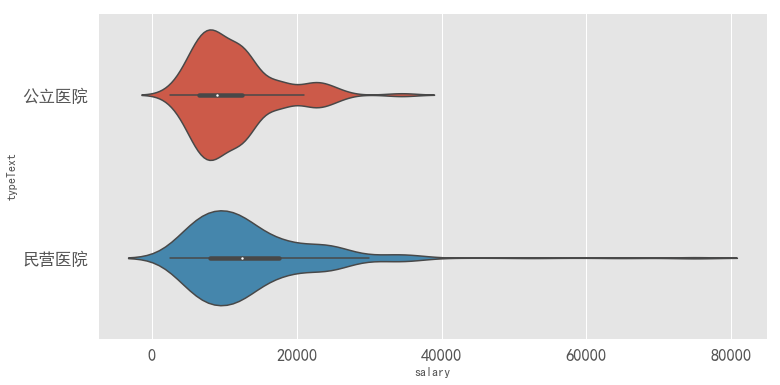

In [38]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x="salary", y="typeText",
               data=all_data[(all_data['typeText'].isin(['公立医院', '民营医院']))&
                            (all_data['depType']=='儿科')],
              ax=ax)

In [34]:
all_data[all_data['depType']=='儿科'].groupby('typeText')['salary'].count()

typeText
公立医院     202
其他单位      58
医药企业      16
民营医院     339
生物企业       2
科研院校       0
诊所/药房     13
Name: salary, dtype: int64

In [35]:
erke_srl =all_data[all_data['depType']=='儿科'].groupby('typeText')['salary'].mean().drop(index='科研院校').sort_values()

In [36]:
bar = Bar("各类型单位儿科平均工资", width = 600,height=500)
bar.add("",erke_srl.index, np.round(erke_srl.values, 0), is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True, xaxis_rotate=20)
bar

#### 2.3 相同工资水平下，公立与民营对医生的学历、职称等要求如何？

In [139]:
all_data[(all_data['depType']=='儿科')&
        (all_data['salary']>8000)&
        (all_data['salary']<10000)&
        (all_data['typeText'].isin(['公立医院', '民营医院']))].groupby(['typeText', 'gradeText'])['id'].count()

typeText  gradeText
公立医院      博士            1
          大专            3
          本科           31
          硕士           12
民营医院      大专           18
          学历不限          8
          本科           21
          硕士            2
Name: id, dtype: int64

In [149]:
grade_same1 = np.round(np.array([3, 31, 12, 1, 0]) / (3+31+12+1)*100, 1)

In [150]:
grade_same2 = np.round(np.array([18, 21, 2, 0, 8]) / (18+21+2+8)*100, 1)

In [153]:
bar = Bar("相同工资水平下公立/民营医院对学历的要求百分比(8k-10k)", width = 600,height=600)
bar.add("公立医院",grade, grade_same1, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True, legend_top=30)
bar.add("民营医院", grade, grade_same2, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True, legend_top=30)
bar

In [152]:
all_data[(all_data['depType']=='儿科')&
        (all_data['salary']>8000)&
        (all_data['salary']<10000)&
        (all_data['typeText'].isin(['公立医院', '民营医院']))].groupby(['typeText', 'positText'])['id'].count()

typeText  positText
公立医院      不限           23
          中级            5
          初级           15
          副高            2
          高级            2
民营医院      不限           17
          中级            6
          初级           24
          副高            2
Name: id, dtype: int64

In [154]:
level

['初级', '中级', '副高', '高级', '不限']

In [155]:
level_same1 = np.round(np.array([15, 5, 2, 2, 23]) / (15+5+2+2+23)*100, 1)
level_same2 = np.round(np.array([24, 6, 2, 0, 17]) / (24+6+2+17)*100, 1)

In [156]:
bar = Bar("相同工资水平下公立/民营医院对职称的要求百分比(8k-10k)", width = 600,height=600)
bar.add("公立医院",level, level_same1, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True, legend_top=30)
bar.add("民营医院", level, level_same2, is_stack=False, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True, legend_top=30)
bar

#### 2.4 全国各区域对于儿科医生的需求

In [183]:
# 对于province的处理结果还不是很满意，再处理以下
def get_province(data):
    province = ['北京', '天津', '河北', '山西', '内蒙古', '辽宁', '吉林', '黑龙江', '上海', '江苏', 
            '浙江', '安徽', '福建', '江西', '山东', '河南', '湖北', '湖南', '广东', '广西', 
            '海南', '重庆', '四川', '贵州', '云南', '西藏', '陕西', '甘肃', '青海', '宁夏', 
            '新疆', '台湾', '香港', '澳门', '国外']
    for i in province:
        if i in data:
            return i

In [184]:
all_data.loc[all_data['depType']=='儿科', 'province2'] = all_data.loc[all_data['depType']=='儿科', 'locationText'].apply(get_province)

In [208]:
demand = all_data.loc[all_data['depType']=='儿科', 'province2'].value_counts()

In [209]:
province = list(demand.index)
value = list(demand.values)
province.extend(['内蒙古', '山西', '青海'])
value.extend([1,1,1])

In [210]:
from pyecharts import Map


map = Map("儿科医生全国各区域需求量", width=600, height=600)
map.add(
    "",
    province,
    value,
    maptype="china",
    is_visualmap=True,
    visual_text_color="#000",
)
map

#### 2.5 儿科医生的要求和福利

In [168]:
from collections import Counter
from pyecharts import WordCloud

In [199]:
all_data.iloc[888]

addressText                                                              
area                                                                  无锡市
createTime                                            2018-03-13 00:00:00
desc_zh                 岗位职责： \r\n1、完善病案 书写病历，记录，分析，检查结果及完成出院小结 \r\n2、...
entId                                                             2935047
entName                                                    上海九悦医疗投资管理有限公司
entScopeText                                                   1000~9999人
entTypeText                                                          民营医院
gradeText                                                              大专
id                                                                 700822
jobTypeText                                                            全职
jobYearText                                                          1-3年
levelText                                                              二级
locationText                          

In [201]:
g = all_data.loc[all_data['depType']=='儿科', 'gradeText'].value_counts()

In [211]:
y = all_data.loc[all_data['depType']=='儿科', 'jobYearText'].value_counts()

In [232]:
l = all_data.loc[all_data['depType']=='儿科', 'levelText'].value_counts()
n = all_data.loc[all_data['depType']=='儿科', 'name'].value_counts()
p = all_data.loc[all_data['depType']=='儿科', 'positText'].value_counts()
t = all_data.loc[all_data['depType']=='儿科', 'typeText'].value_counts()

welfare= []
for i in all_data.loc[all_data['depType']=='儿科', 'welfare']:
    if len(i) > 0:
        welfare.extend(i)
w = pd.Series(Counter(welfare))
all = pd.concat([g, y, l, n, p, t, w])

In [241]:
name, value = all.index, all.values
wordcloud = WordCloud(width=800, height=800)
wordcloud.add("", name, value, word_size_range=[20, 80])
wordcloud